## Exploration

train.csv shape is  (555719, 23)
test.csv shape is  (69465, 2)

       Id trans_date_trans_time        cc_num  \
0  205743      01/09/2020 08:22  5.596350e+15   
1  465349      12/12/2020 07:42  4.311370e+18   
2   17312      27/06/2020 13:03  2.264940e+15   
3  234968      14/09/2020 04:12  2.224100e+15   
4  194255      28/08/2020 17:40  3.527540e+15   

                              merchant       category      amt    first  \
0                      fraud_Berge LLC  gas_transport    72.18   Joseph   
1  fraud_Eichmann, Bogan and Rodriguez  gas_transport    36.66  Phillip   
2              fraud_Ankunding-Carroll         travel     1.74     Juan   
3     fraud_Schumm, Bauch and Ondricka    grocery_pos   140.99    Sheri   
4                    fraud_Gerlach Inc   shopping_net  1722.19   Teresa   

       last gender                        street  ...      lat      long  \
0     Moody      M              5901 Foster Pine  ...  29.9912  -90.2479   
1  Delacruz      M     26678 Lisa Lock

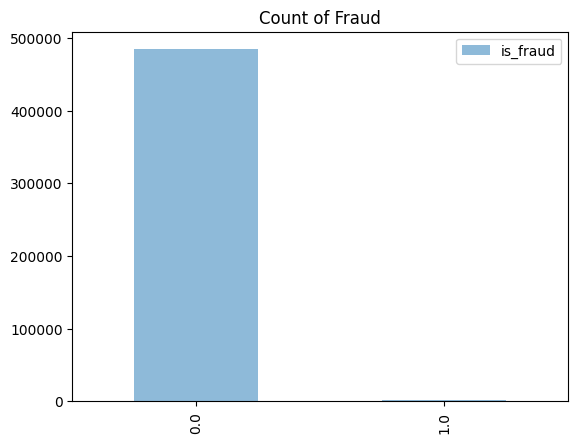

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['is_fraud'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Count of Fraud")
plt.show()

## Feature Extraction

In [87]:
import pandas as pd
trainingSet = pd.read_csv("./data/train.csv")

In [161]:
from tqdm import tqdm
tqdm.pandas()
def process(data):
    df = data
        
    #This is where you can do all your processing
    date_time = pd.to_datetime(df['trans_date_trans_time'], format='%d/%m/%Y %H:%M')

    df["weekday"] = date_time.dt.weekday
    df['trans_date'] = date_time.dt.date[0]
    df['trans_time'] = date_time.dt.time[0]
    def process_fun(row):
        wd = [0,0,0,0,0,0,0]
        wd[row["weekday"]] = 1
        
        row[["Mon","Tue","Wed","Thur","Fri","Sat","Sun"]] = wd
        cc = str(int(row["cc_num"]))
        row["MII"] = cc[0]
        row["amt_sub1500"] = 1 if row["amt"] < 1500 else 0
        row["city_popsub2mil"] =  1 if row["city_pop"] < 2000000 else 0
        row["city_popsub500k"] = 1 if row["city_pop"] < 500000 else 0
        return row
    df = df.progress_apply(process_fun,axis=1)


    return df

# Load the dataset

# Process the DataFrame
train_processed = process(trainingSet)
train_processed[["MII_1","MII_2","MII_3","MII_4","MII_5","MII_6"]] = pd.get_dummies(train_processed["MII"])
for cat in ["category","gender","state"]:
    train_processed[train_processed[cat].unique()] = pd.get_dummies(train_processed[cat])

train_processed.drop(columns=['trans_date_trans_time','trans_weekday'], inplace=True)
# # Load test set
submissionSet = pd.read_csv("./data/test.csv")

# Merge on Id so that the test set can have feature columns as well
testX= pd.merge(train_processed, submissionSet, left_on='Id', right_on='Id')
testX = testX.drop(columns=['is_fraud_x'])
testX = testX.rename(columns={'is_fraud_y': 'is_fraud'})

# The training set is where the score is not null
trainX =  train_processed[train_processed['is_fraud'].notnull()]

# Save the datasets with the new features for easy access later
testX.to_csv("./data/X_test.csv", index=False)
trainX.to_csv("./data/X_train.csv", index=False)

 25%|██████████████████                                                       | 137263/555719 [07:50<24:56, 279.67it/s]Exception ignored in: <function tqdm.__del__ at 0x00000260041E5630>
Traceback (most recent call last):
  File "C:\Users\laser\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\std.py", line 1145, in __del__
    self.close()
  File "C:\Users\laser\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\std.py", line 1274, in close
    if self.last_print_t < self.start_t + self.delay:
AttributeError: 'tqdm' object has no attribute 'last_print_t'
100%|█████████████████████████████████████████████████████████████████████████| 555719/555719 [37:17<00:00, 248.33it/s]
C:\Users\laser\AppData\Local\Temp\ipykernel_14164\448633607.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a 

KeyError: 'category'

In [162]:
train_processed[["MII_1","MII_2","MII_3","MII_4","MII_5","MII_6"]] = pd.get_dummies(train_processed["MII"])
for cat in ["category","gender","state"]:
    train_processed[train_processed[cat].unique()] = pd.get_dummies(train_processed[cat])


# # Load test set
submissionSet = pd.read_csv("./data/test.csv")

# Merge on Id so that the test set can have feature columns as well
testX= pd.merge(train_processed, submissionSet, left_on='Id', right_on='Id')
testX = testX.drop(columns=['is_fraud_x'])
testX = testX.rename(columns={'is_fraud_y': 'is_fraud'})

# The training set is where the score is not null
trainX =  train_processed[train_processed['is_fraud'].notnull()]

# Save the datasets with the new features for easy access later
testX.to_csv("./data/X_test.csv", index=False)
trainX.to_csv("./data/X_train.csv", index=False)

KeyError: 'category'

In [117]:
tx = pd.read_csv("./data/X_test.csv")
tx[["MII_1","MII_2","MII_3","MII_4","MII_5","MII_6"]] = pd.get_dummies(tx["MII"])
tx.to_csv("./data/X_test.csv", index=False)

In [146]:
train_processed

,Id,cc_num,merchant,amt,first,last,street,city,state,zip,...,ID,TN,ME,UT,NV,NM,AZ,NH,AK,RI
0,205743,5.596350e+15,fraud_Berge LLC,72.18,Joseph,Moody,5901 Foster Pine,Kenner,LA,70062,...,0,0,0,0,0,0,0,0,0,0
1,465349,4.311370e+18,"fraud_Eichmann, Bogan and Rodriguez",36.66,Phillip,Delacruz,26678 Lisa Locks Apt. 904,Iliff,CO,80736,...,0,0,0,0,0,0,0,0,0,0
2,17312,2.264940e+15,fraud_Ankunding-Carroll,1.74,Juan,Sherman,5939 Garcia Forges Suite 297,San Antonio,TX,78214,...,0,0,0,0,0,0,0,0,0,0
3,234968,2.224100e+15,"fraud_Schumm, Bauch and Ondricka",140.99,Sheri,Thomas,019 Kimberly Light Apt. 039,Kings Bay,GA,31547,...,0,0,0,0,0,0,0,0,0,0
4,194255,3.527540e+15,fraud_Gerlach Inc,1722.19,Teresa,Stein,2838 White Fields Apt. 473,Brunson,SC,29911,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,518797,3.534330e+15,"fraud_Douglas, Schneider and Turner",136.87,Jeffrey,Smith,713 Scott Pike Apt. 712,Bridger,MT,59014,...,0,0,0,0,0,0,0,0,0,0
555715,429820,4.951650e+15,"fraud_Rutherford, Homenick and Bergstrom",39.83,Kimberly,Miller,75533 Tamara Valleys,Logan,IL,62856,...,0,0,0,0,0,0,0,0,0,0
555716,356090,3.533800e+15,"fraud_Moen, Reinger and Murphy",140.49,Amber,Thornton,840 Werner Lock Apt. 852,Campbell,NE,68932,...,0,0,0,0,0,0,0,0,0,0
555717,107848,4.683520e+15,"fraud_Bradtke, Torp and Bahringer",21.43,Charles,Carrillo,17547 Stephen Turnpike Apt. 846,Hawthorne,CA,90250,...,0,0,0,0,0,0,0,0,0,0


2809


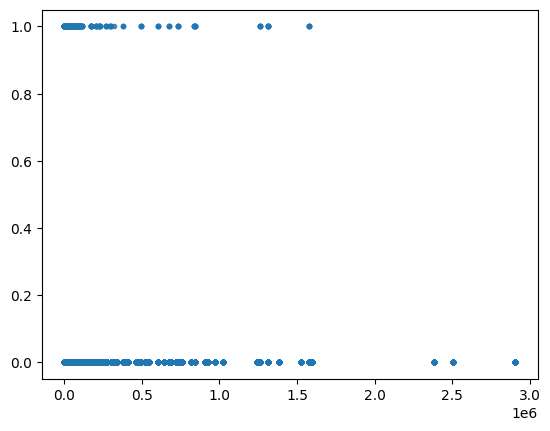

In [139]:
tp = train_processed
print(len(tp[tp["city_pop"] > 2000000]))
plt.scatter(tp["city_pop"],tp["is_fraud"],alpha = 0.5,marker = ".")

In [94]:
for day in ["MII_1","MII_2","MII_3","MII_4","MII_5","MII_6"]:
    td = train_processed[train_processed[day] == 1]
    print(day)
    print(len(td[td["is_fraud"] == 1])/(len(td[td["is_fraud"] == 1]) + len(td[td["is_fraud"] == 0])))

MII_1
0.004632693580410324
MII_2
0.003490437872295956
MII_3
0.0042302479122032265
MII_4
0.0036260925989541584
MII_5
0.004130075645596035
MII_6
0.0033424794213020702


## Creating your model

Index(['cc_num', 'amt', 'city_pop', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat',
       'Sun', 'gas_transport', 'travel', 'grocery_pos', 'shopping_net', 'home',
       'entertainment', 'personal_care', 'food_dining', 'kids_pets',
       'shopping_pos', 'health_fitness', 'misc_net', 'grocery_net', 'misc_pos',
       'M', 'F', 'LA', 'CO', 'TX', 'GA', 'SC', 'FL', 'AR', 'IA', 'MN', 'IL',
       'MI', 'WA', 'NJ', 'PA', 'CT', 'CA', 'MA', 'MO', 'VA', 'OK', 'MD', 'OR',
       'AL', 'NC', 'MT', 'NE', 'NY', 'ND', 'KS', 'OH', 'VT', 'HI', 'MS', 'IN',
       'WI', 'KY', 'WY', 'SD', 'DC', 'WV', 'ID', 'TN', 'ME', 'UT', 'NV', 'NM',
       'AZ', 'NH', 'AK', 'RI', 'MII_1', 'MII_2', 'MII_3', 'MII_4', 'MII_5',
       'MII_6'],
      dtype='object')
Accuracy on testing set =  0.9970715014313448
F1 score on testing set =  0.623678646934461


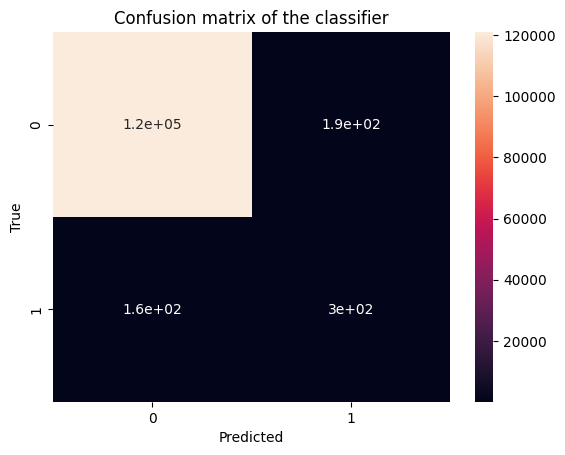

In [124]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Load training set with new features into DataFrame
X_train =pd.read_csv("./data/X_train.csv")
X_train[["MII_1","MII_2","MII_3","MII_4","MII_5","MII_6"]] = pd.get_dummies(X_train["MII"])
X_train.drop(columns=["MII","Id","zip","lat","long","unix_time","merch_lat","merch_long","cc_num"],inplace = True)

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_train.drop(['is_fraud'], axis=1),
        X_train['is_fraud'],
        test_size=1/4.0,
        random_state=0
    )

# This is where you can do more feature selection
X_train_processed = X_train._get_numeric_data()
print(X_train_processed.columns)
X_test_processed = X_test._get_numeric_data()

# Learn the model
model = DecisionTreeClassifier().fit(X_train_processed, Y_train)

# pickle model - saves it so you can load it later
with open('knn_20_model.obj', 'wb') as f:
        pickle.dump(model, f)
# to load pickled model: 
# with open('filename', 'rb') as f:
#    model = pickle.load(f)

# Evaluate your model on the testing set
Y_test_predictions = model.predict(X_test_processed)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("F1 score on testing set = ", f1_score(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions)
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Create the Kaggle submission

In [127]:
X_submission = pd.read_csv("./data/X_test.csv")
Ids = X_submission["Id"]
X_submission.drop(columns=["MII","Id","zip","lat","long","unix_time","merch_lat","merch_long"],inplace = True)
X_submission_processed = X_submission._get_numeric_data().drop(columns=['is_fraud'])
print(X_submission_processed.columns)

X_submission['is_fraud'] = model.predict(X_submission_processed)
X_submission.is_fraud = X_submission.is_fraud.astype(int)
X_submission["Id"] = Ids
submission = X_submission[['Id', 'is_fraud']]
submission.to_csv("./data/submission.csv", index=False)

Index(['cc_num', 'amt', 'city_pop', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat',
       'Sun', 'gas_transport', 'travel', 'grocery_pos', 'shopping_net', 'home',
       'entertainment', 'personal_care', 'food_dining', 'kids_pets',
       'shopping_pos', 'health_fitness', 'misc_net', 'grocery_net', 'misc_pos',
       'M', 'F', 'LA', 'CO', 'TX', 'GA', 'SC', 'FL', 'AR', 'IA', 'MN', 'IL',
       'MI', 'WA', 'NJ', 'PA', 'CT', 'CA', 'MA', 'MO', 'VA', 'OK', 'MD', 'OR',
       'AL', 'NC', 'MT', 'NE', 'NY', 'ND', 'KS', 'OH', 'VT', 'HI', 'MS', 'IN',
       'WI', 'KY', 'WY', 'SD', 'DC', 'WV', 'ID', 'TN', 'ME', 'UT', 'NV', 'NM',
       'AZ', 'NH', 'AK', 'RI', 'MII_1', 'MII_2', 'MII_3', 'MII_4', 'MII_5',
       'MII_6'],
      dtype='object')


Now you can upload the `submission.csv` to kaggle